In [1]:
from modules.data_gen import DataGenerator, get_data, real_u1
from modules.pinn import PINNModel, model1, model3, optm1, print_model_summary_with_activations

from modules.accuracy import AccuracyCalc
from modules.plotting import NNPlots

import os

2024-12-24 23:53:35.553562: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-24 23:53:35.565957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-24 23:53:35.580211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-24 23:53:35.583596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-24 23:53:35.593605: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print_model_summary_with_activations(model=model3())

I0000 00:00:1735073616.738550   38636 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735073616.763787   38636 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735073616.763928   38636 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735073616.765745   38636 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: sequential
Layer (type)         Param #    Activation     
dense (Dense)        96         custom_activation2
dense_1 (Dense)      1056       custom_activation1
dense_2 (Dense)      1056       custom_activation1
dense_3 (Dense)      1056       custom_activation1
dense_4 (Dense)      1056       custom_activation1
dense_5 (Dense)      1056       custom_activation1
dense_6 (Dense)      1056       custom_activation1
dense_7 (Dense)      1056       custom_activation1
dense_8 (Dense)      1056       custom_activation1
dense_9 (Dense)      1056       custom_activation1
dense_10 (Dense)     1056       custom_activation1
dense_11 (Dense)     33         linear         
Total params: 10689
Trainable params: 10689
Non-trainable params: 0


In [3]:
%%capture
# to supress output
grid = (70, 70)
alldata = []
for session in [1, 2, 3]:
    data = get_data(sess=session)
    koefs_list = data['two_pow']

    model = PINNModel(model1(), optm=optm1())
    dg = DataGenerator(data['x'], data['y'], model.predict, real_u1)

    dataset = dg.inner_pairs(grid), dg.border_pairs(grid)

    acc = AccuracyCalc(dg, grid)

    existing_koefs = []
    mse_loss_record = []
    max_loss_record = []
    train_loss_record = []

    output = False

    for koef in koefs_list:
        if os.path.exists(DataGenerator.name(koef, session)):
            model.load(dg.name(koef, session))
            acc.update_predicitons((70, 70))

            existing_koefs.append(koef)
            max_loss_record.append(acc.maxe())
            mse_loss_record.append(acc.mse())
            train_loss_record.append(model.loss(koef, *dataset))
            if output:
                print(f'mse_loss: {mse_loss_record[-1]}')
                print(f'max_loss: {max_loss_record[-1]}')
                print(f'model loss: {model.loss(koef, *dataset)}')
                print()

    alldata.append([existing_koefs, mse_loss_record, max_loss_record, train_loss_record])
    

I0000 00:00:1735071770.786606   27419 service.cc:146] XLA service 0x7e20e80065e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735071770.786633   27419 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-24 23:22:50.836539: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1735071771.321470   27419 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [3]:
data = get_data(sess=1)
koefs_list = data['two_pow']

model = PINNModel(model1(), optm=optm1())

dg = DataGenerator(data['x'], data['y'], model.predict, real_u1)

plotter = NNPlots(dg, grid)

for d, tit in zip(alldata, ["100 epochs", "300 epochs", "600 epochs"]):
    plotter.plot_error(tit, d[0], d[1], "MSE", x_scale="log", y_scale="log")
    plotter.plot_error(tit, d[0], d[2], "Max error", x_scale="log", y_scale="log")
    plotter.plot_error(tit, d[0], d[3], "Loss", x_scale="log", y_scale="log")

plotter.plot_error_mult(["100 epochs", "300 epochs", "600 epochs"], 1, alldata, "MSE", x_scale="log", y_scale="log")

plotter.plot2d_contour_mult()


/home/c0c0nut/Projects/PINN_Poisson/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 25 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'alldata' is not defined

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/home/c0c0nut/Projects/PINN_Poisson/src/modules/plotting.py:189: UserWarning: The following kwargs were not used by contour: 'linestyle'
  axes.contour(


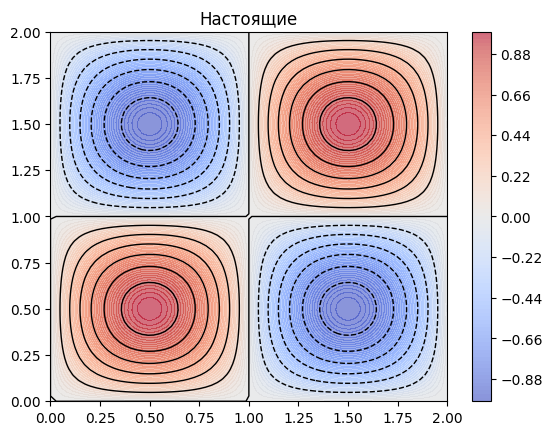

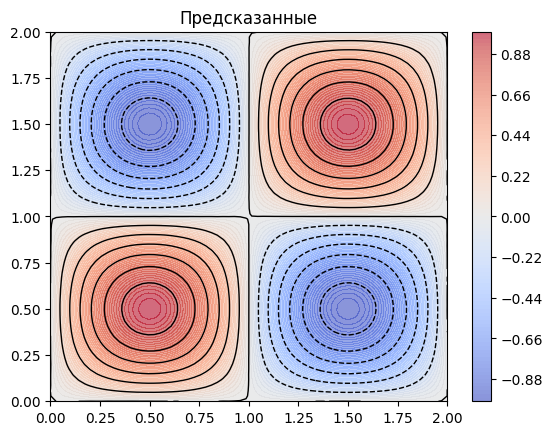

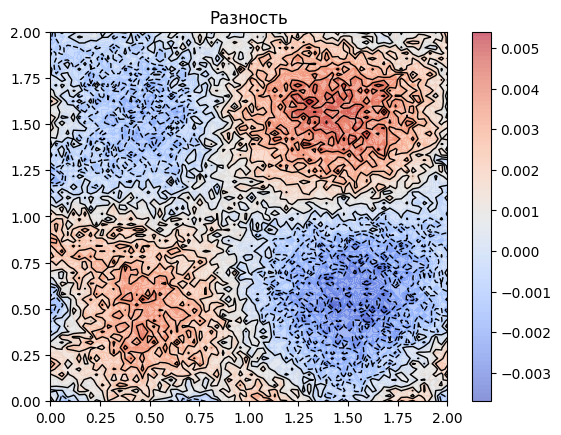

In [4]:
data = get_data(sess=23)
koefs_list = data['two_pow']

model = PINNModel(model1(), optm=optm1())
model.load("../models/s22/model13.454342644059432.weights.h5")

dg = DataGenerator(data['x'], data['y'], model.predict, real_u1)

grid = (70, 70)
plotter = NNPlots(dg, grid)

plotter.plot2d_contour_mult()

In [12]:
# plotter.plot2d_contour(color_map="gnuplot2")
# plotter.plot2d_contour()